## Zadanie 1: Algorytm k-średnich

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('spirala.txt', delimiter=r'\s+', header=None)
df.columns = ['x', 'y']
df

,x,y
0,-0.0824,0.9435
1,-0.0824,0.9435
2,0.0913,0.9575
3,0.0476,1.0683
4,0.2311,1.0452
...,...,...
97,-0.5031,1.8191
98,-0.3340,1.8515
99,-0.3200,1.9158
100,-0.2074,1.9929


In [24]:
m = 4
iters = 100

In [25]:
V = df.sample(m)  # 1. Wybierz losowo m różnych próbek i uznaj je jako środki grup (V)
V

,x,y
4,0.2311,1.0452
100,-0.2074,1.9929
37,1.1371,-0.7834
53,-0.1725,-1.5277


In [26]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [27]:
def plot_clusters(df, V, u_s, iteration):
    plt.clf()
    colors = ['blue', 'lime', 'cyan', 'magenta']
    
    for i in range(len(V)):
        points = df[u_s == i]
        plt.scatter(points['x'].values, points['y'].values, color=colors[i])
    
    plt.scatter(V['x'].values, V['y'].values, color='red', marker='x', s=100)
    plt.title(f'Iteration {iteration + 1}')
    plt.show()

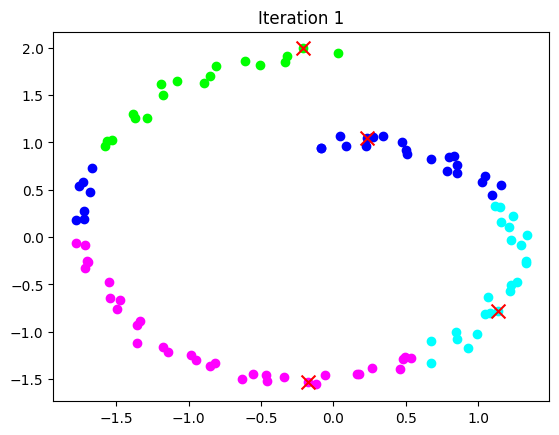

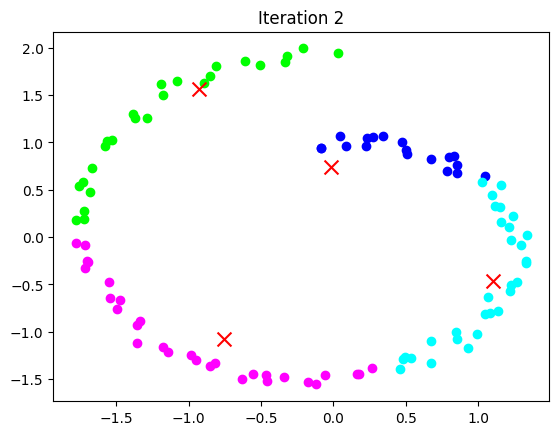

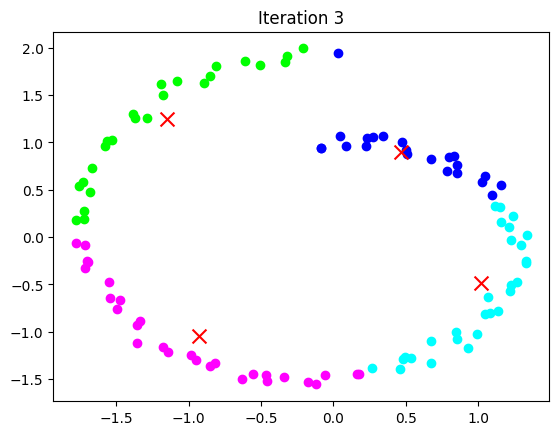

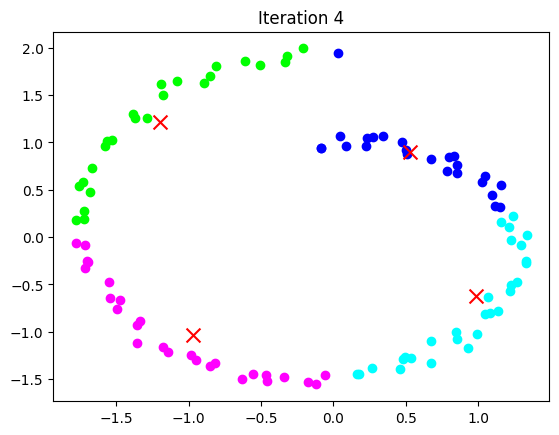

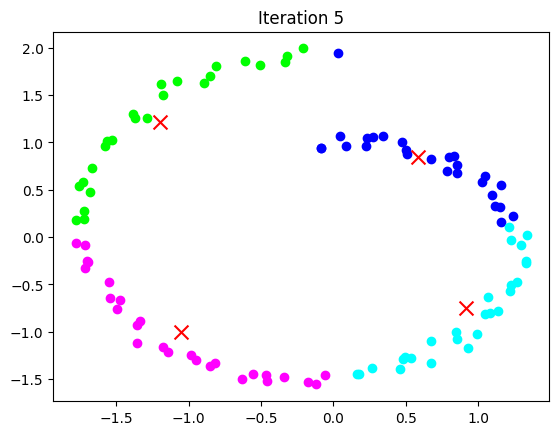

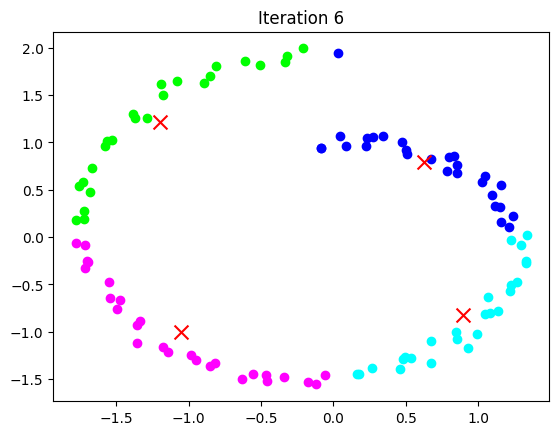

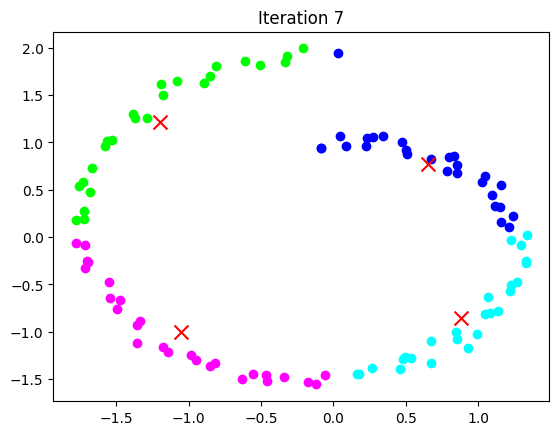

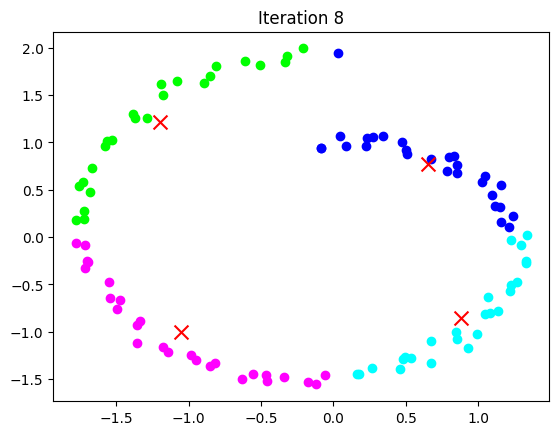

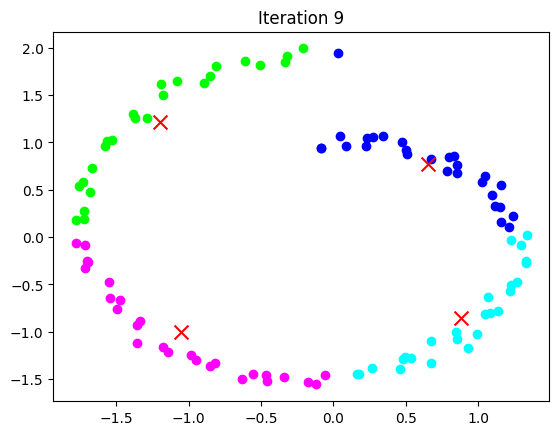

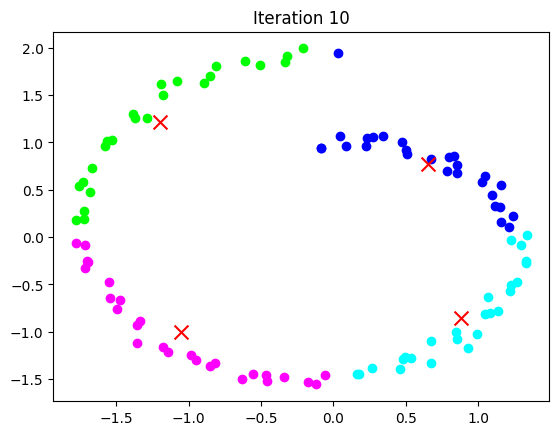

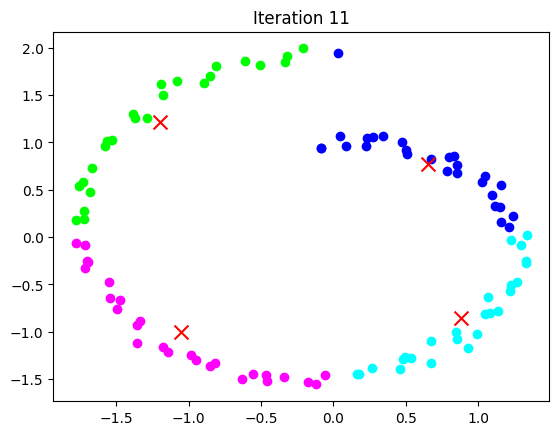

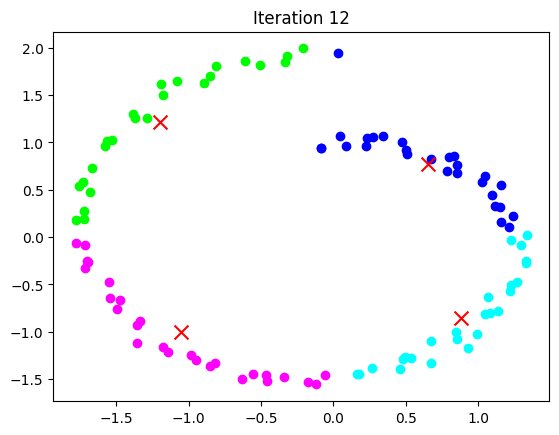

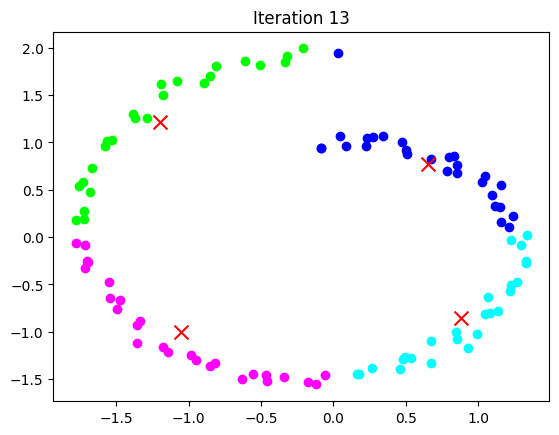

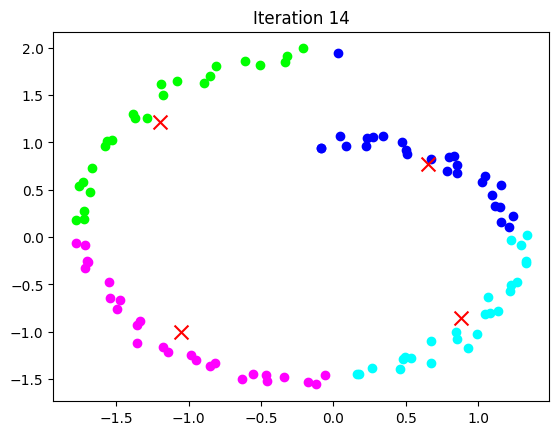

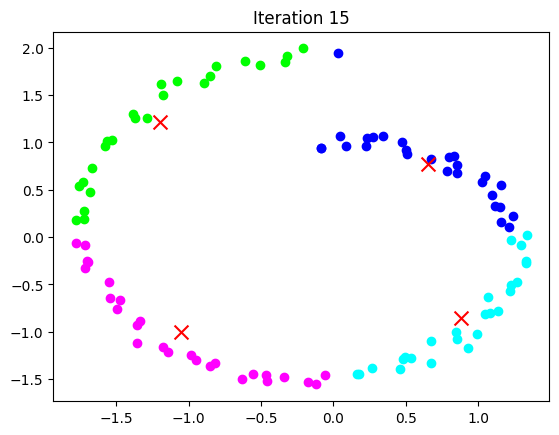

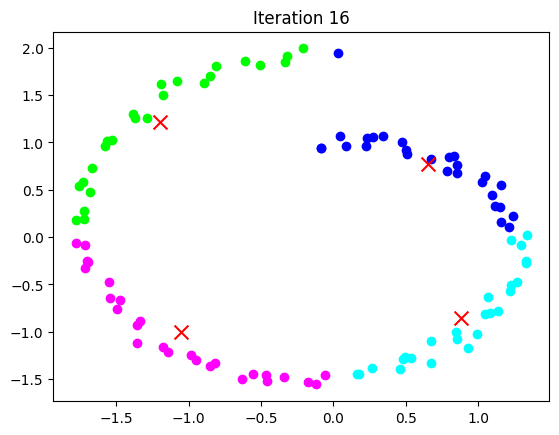

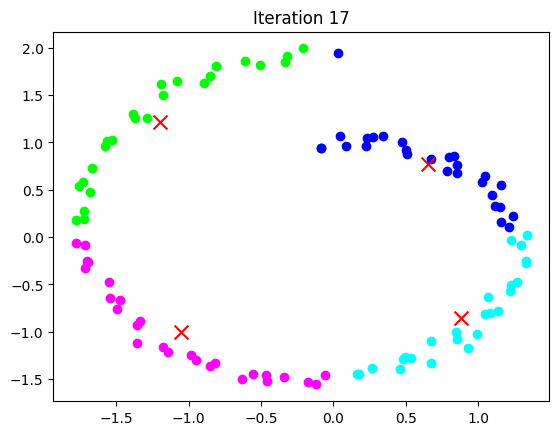

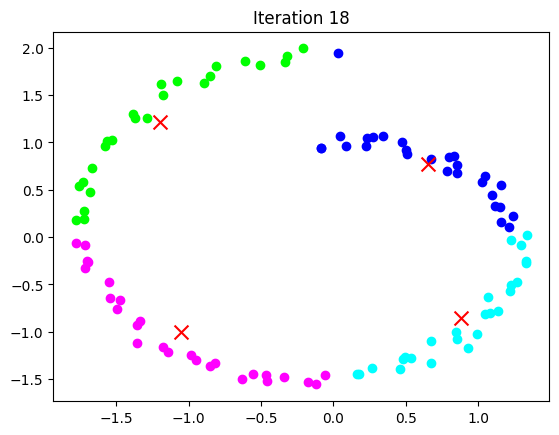

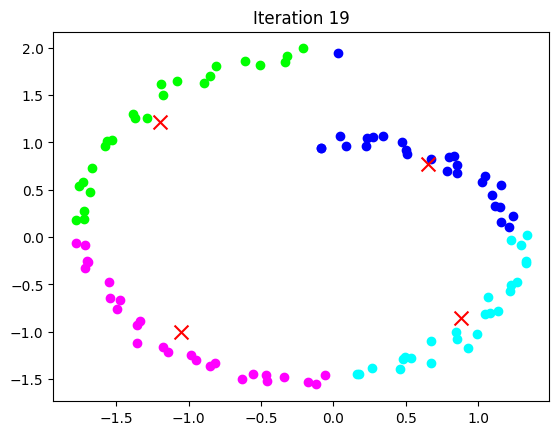

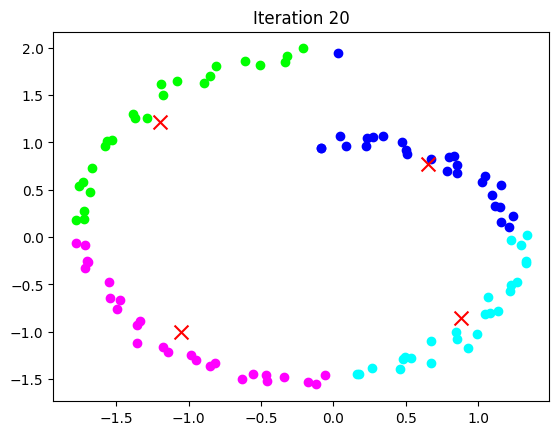

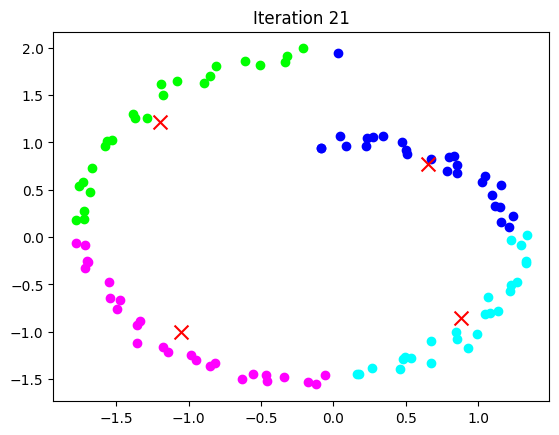

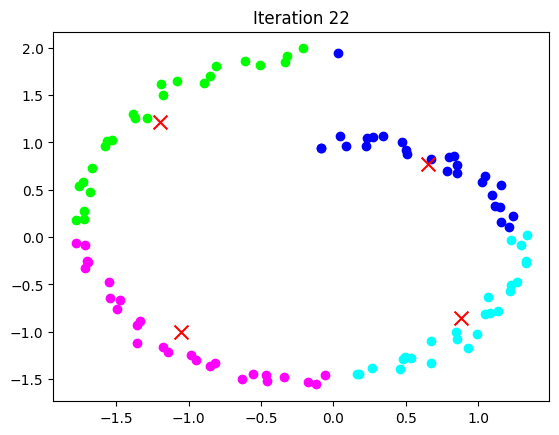

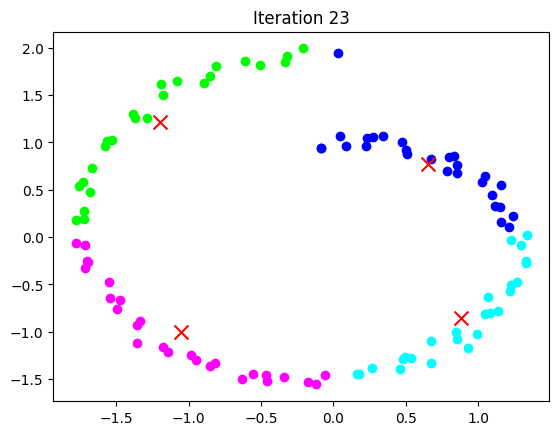

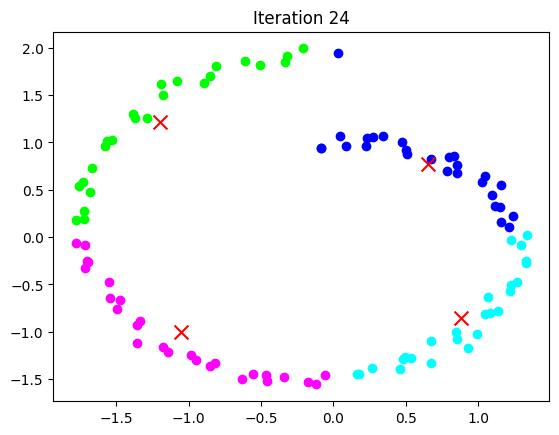

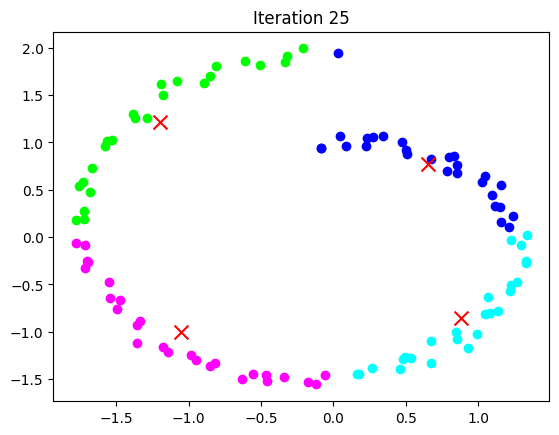

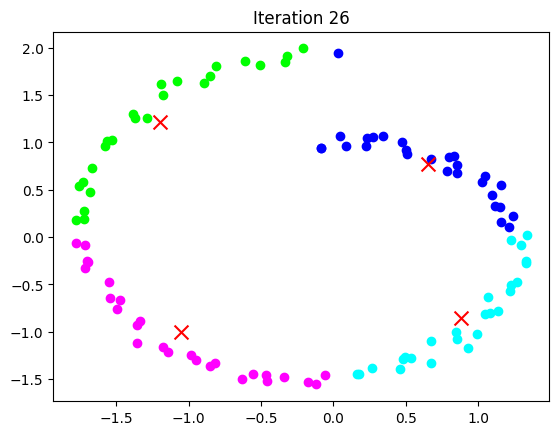

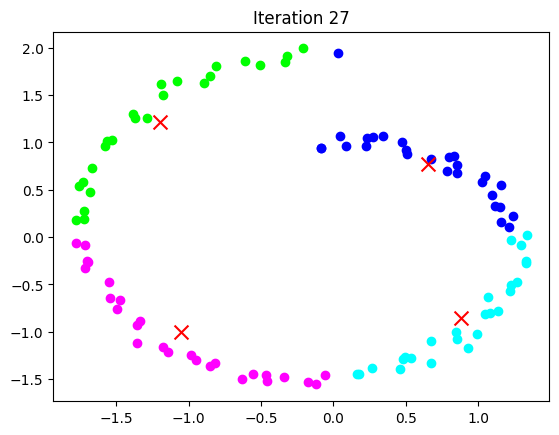

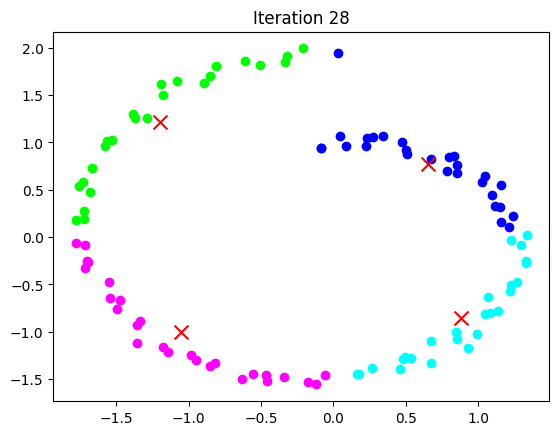

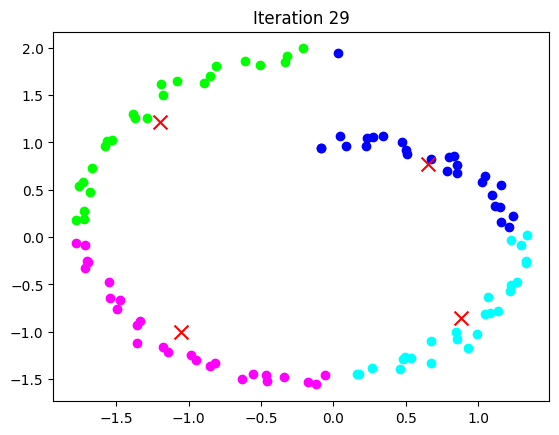

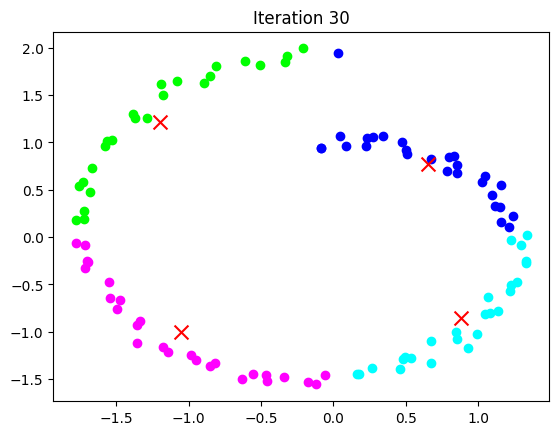

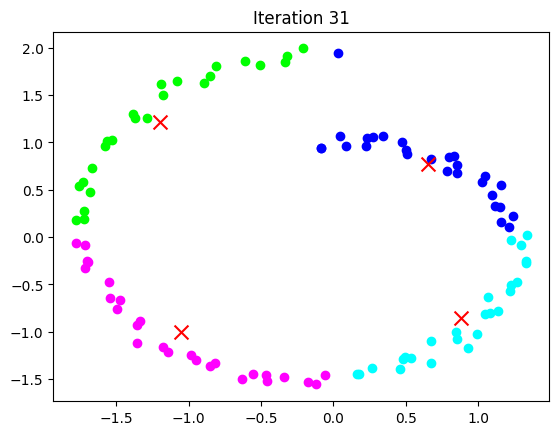

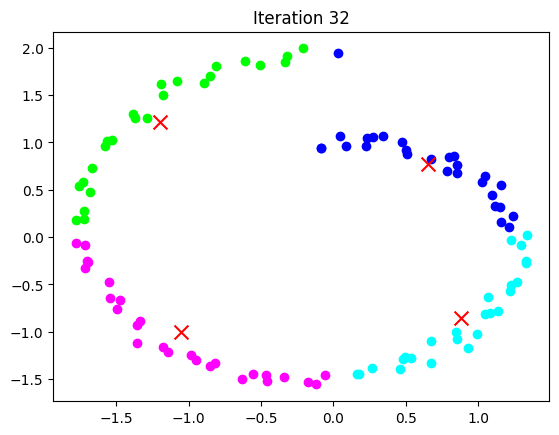

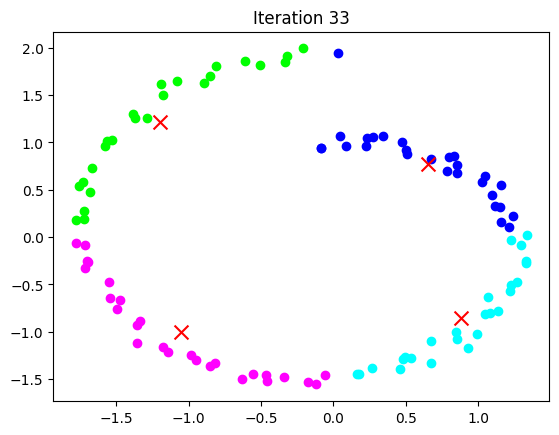

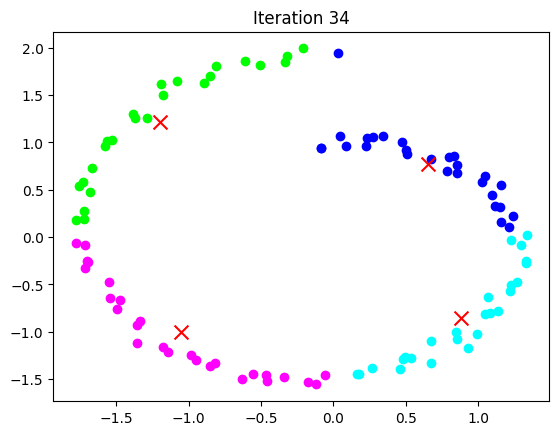

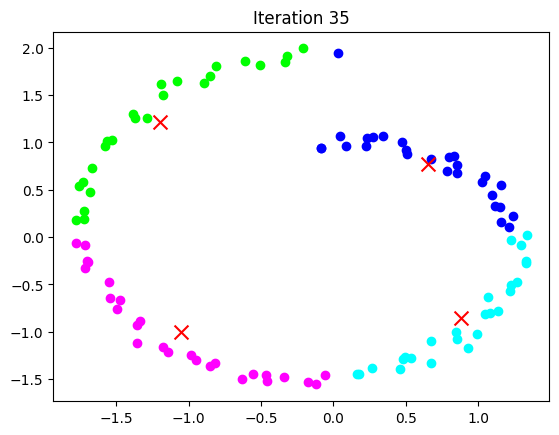

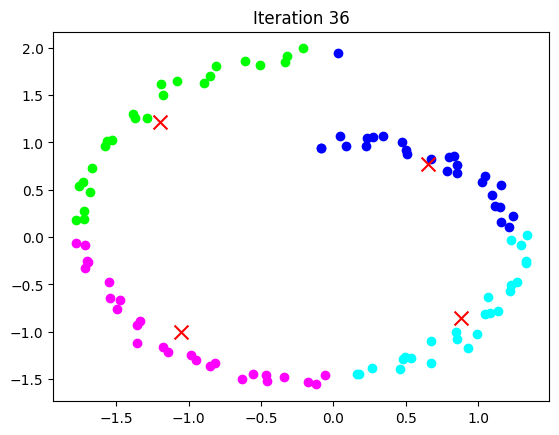

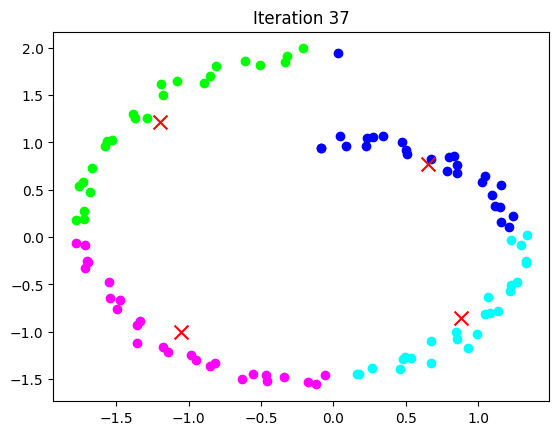

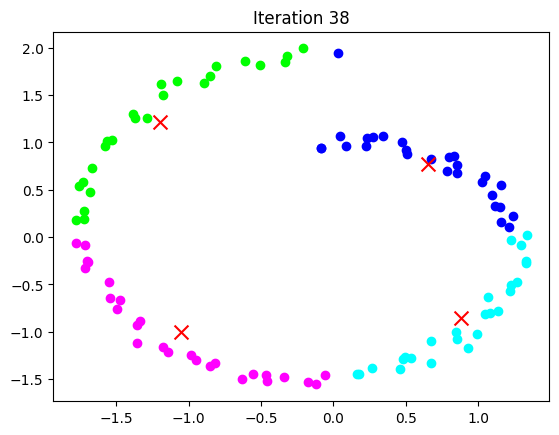

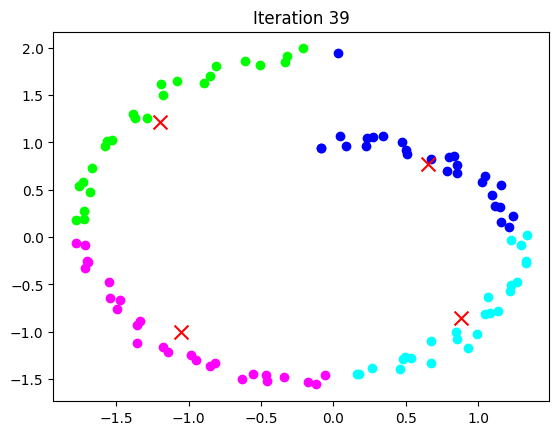

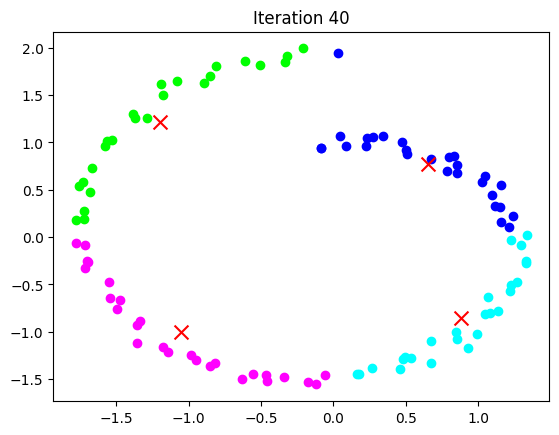

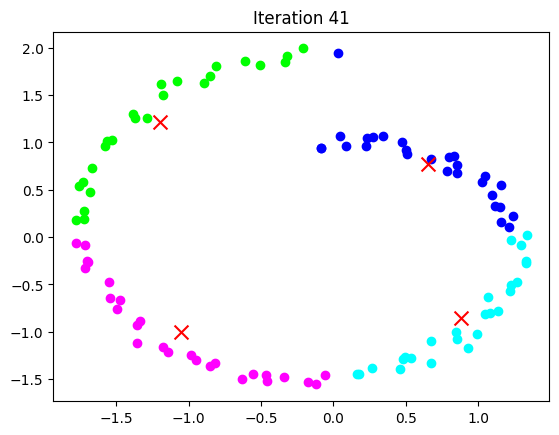

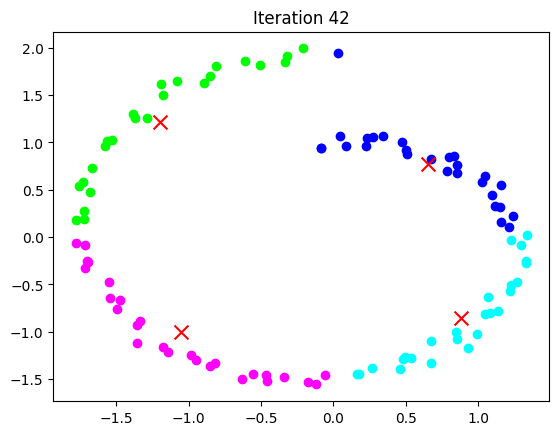

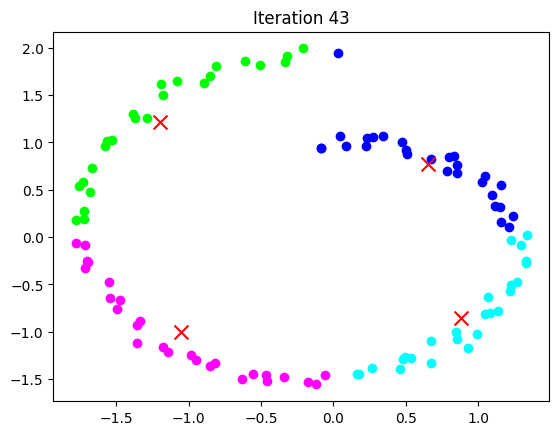

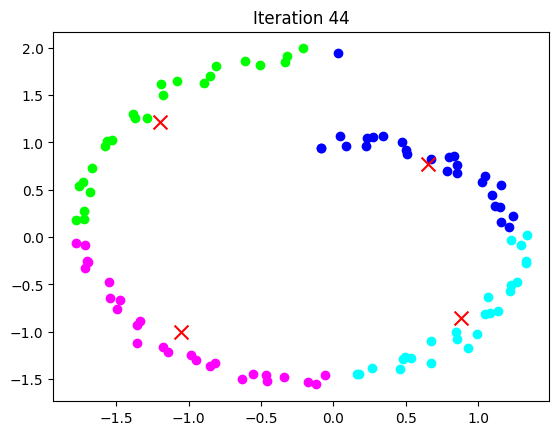

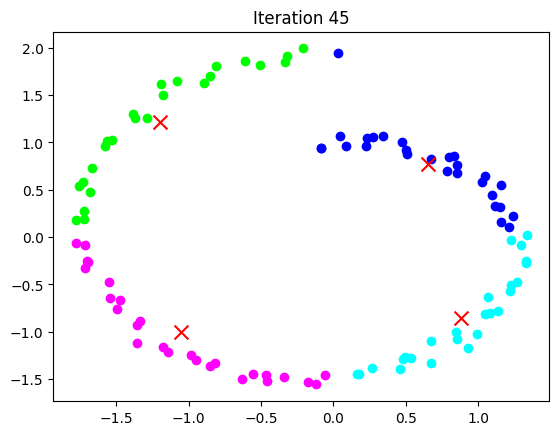

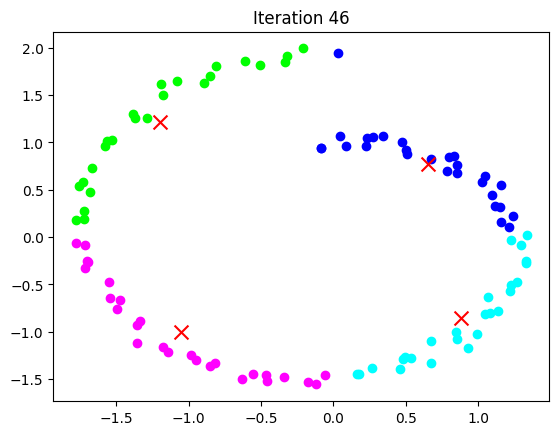

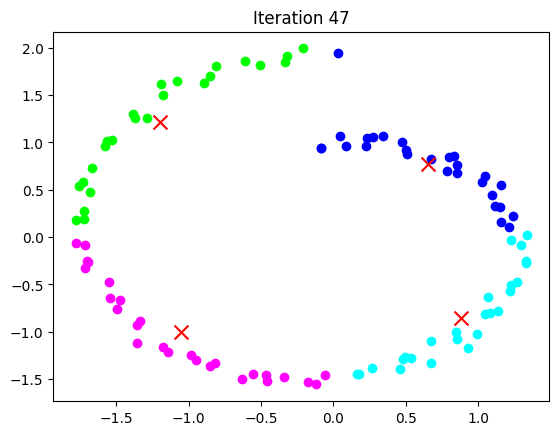

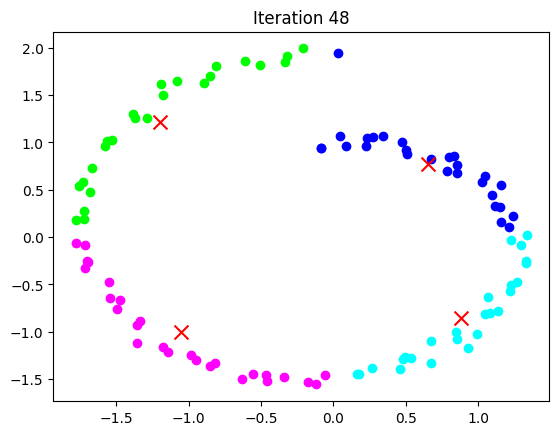

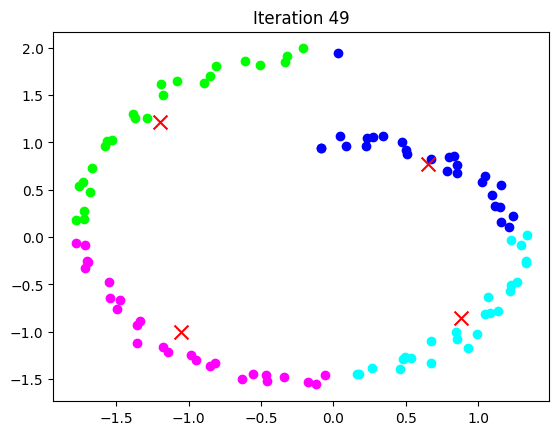

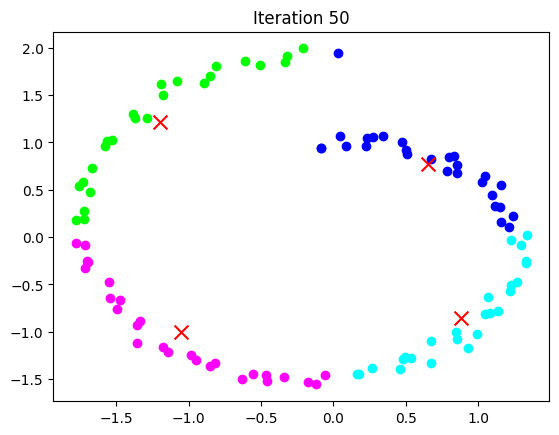

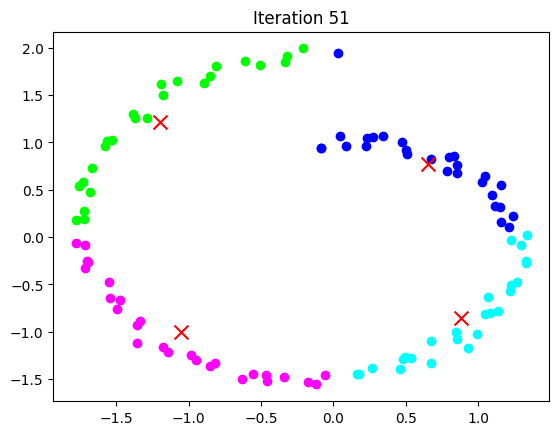

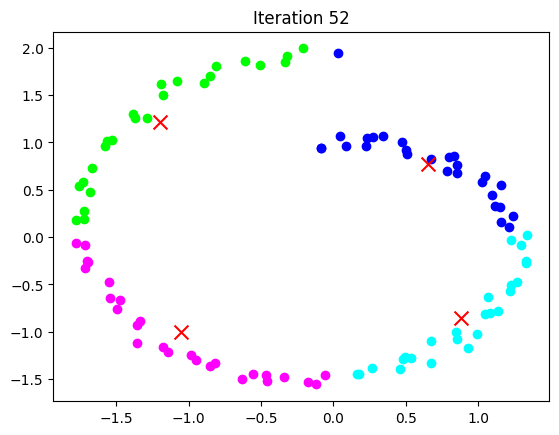

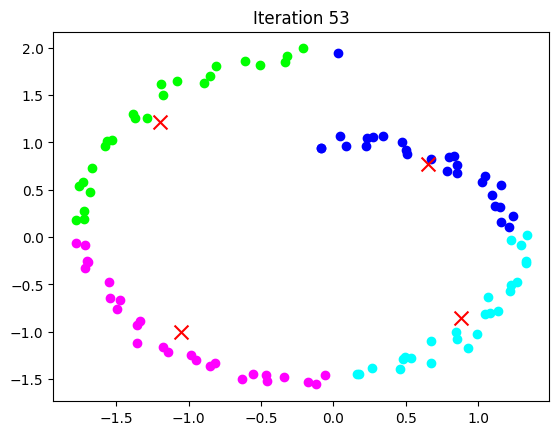

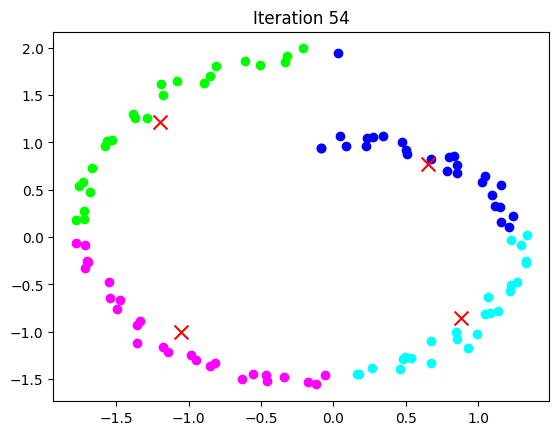

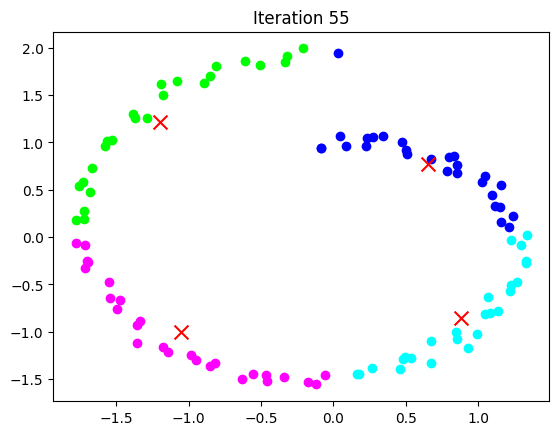

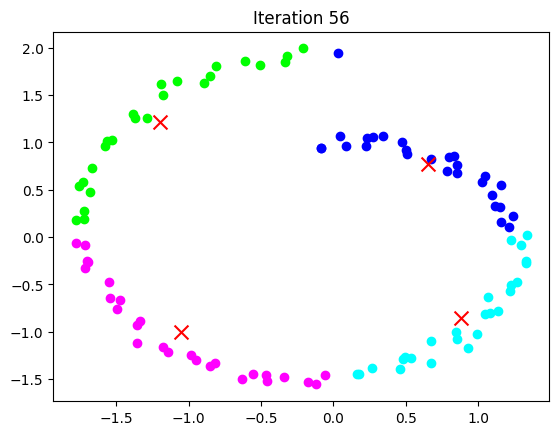

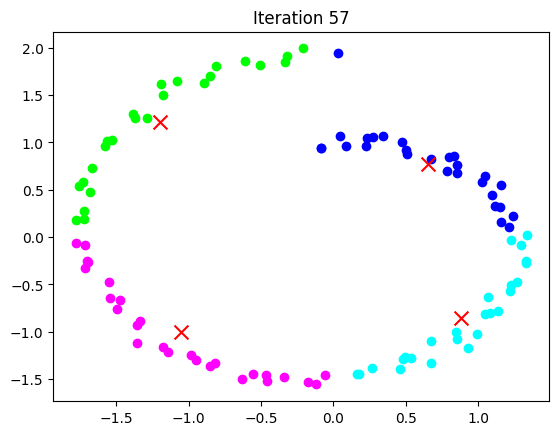

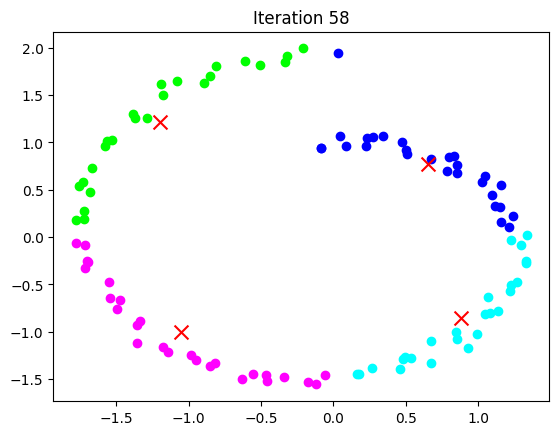

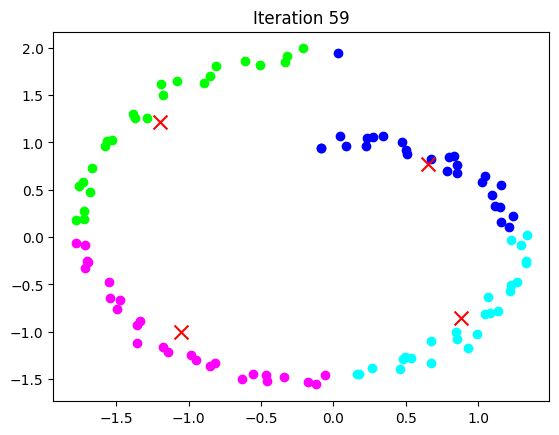

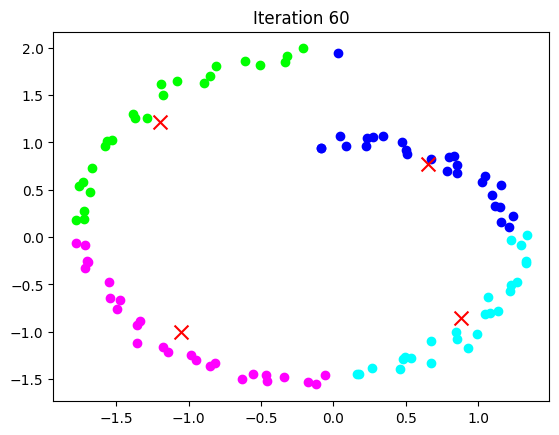

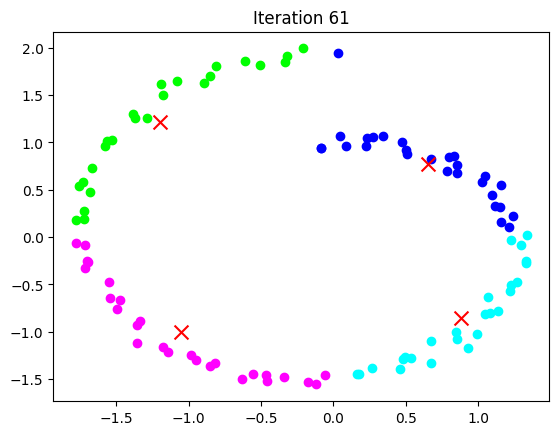

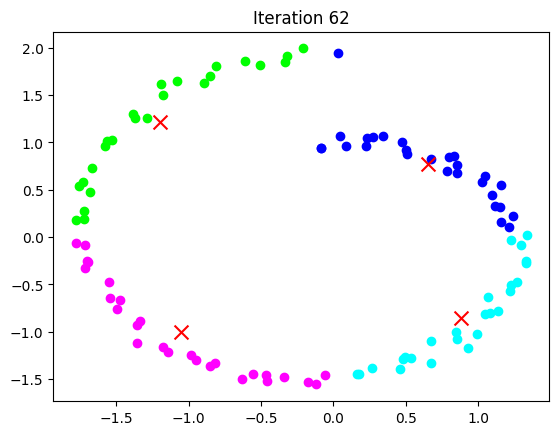

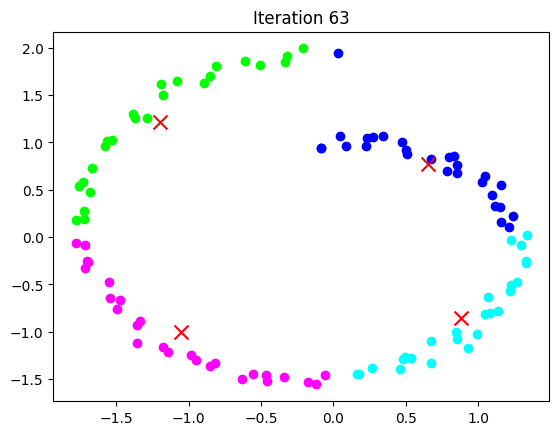

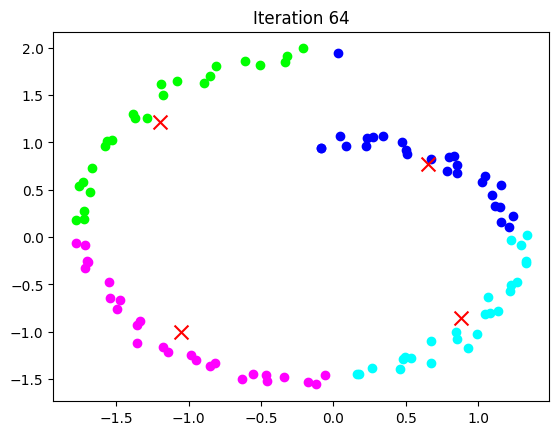

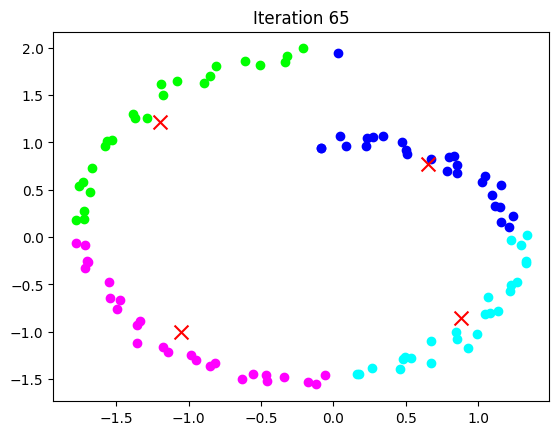

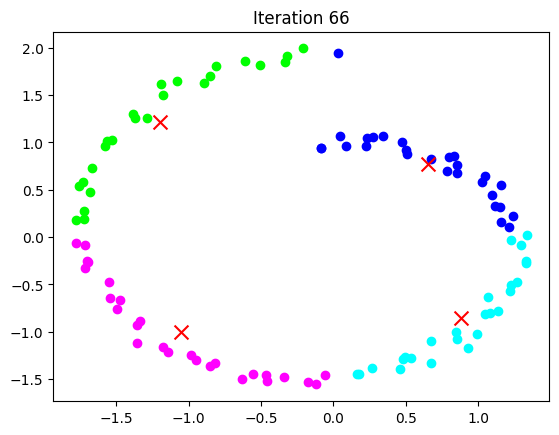

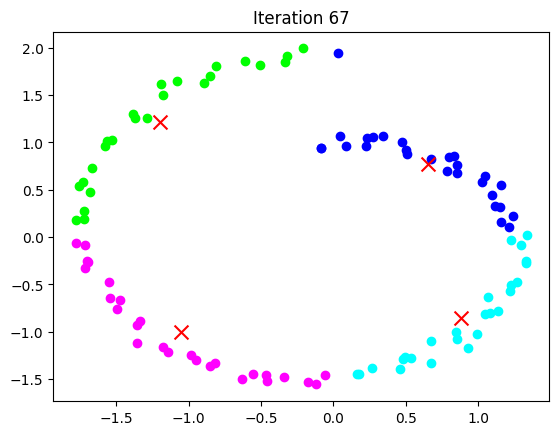

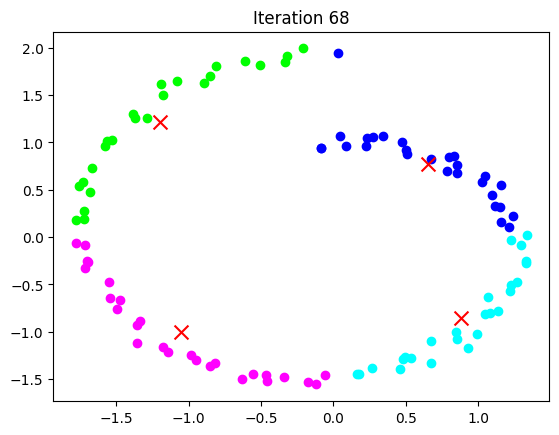

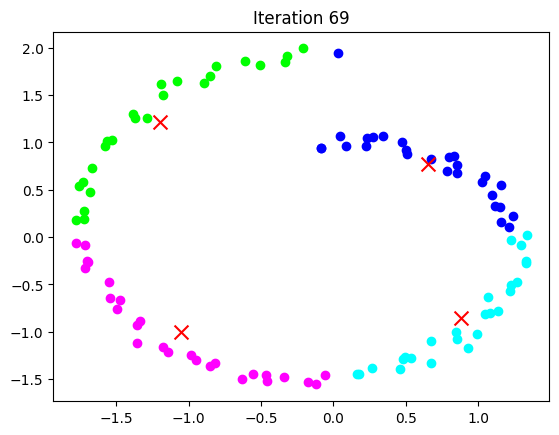

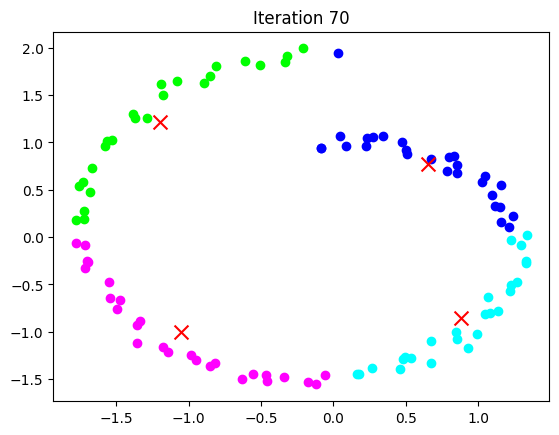

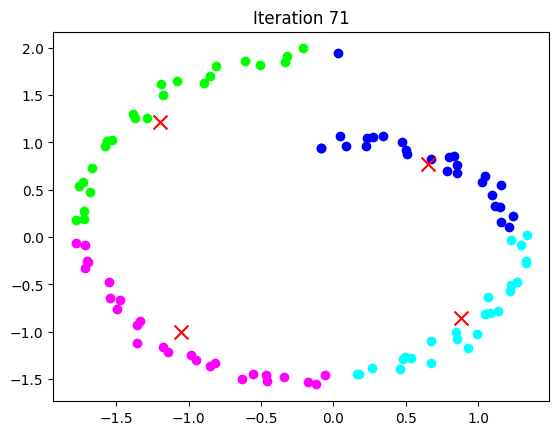

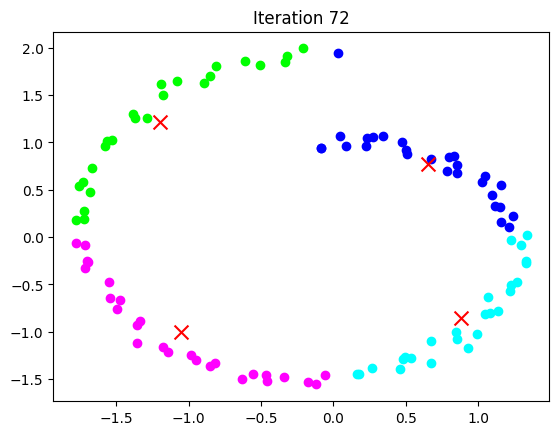

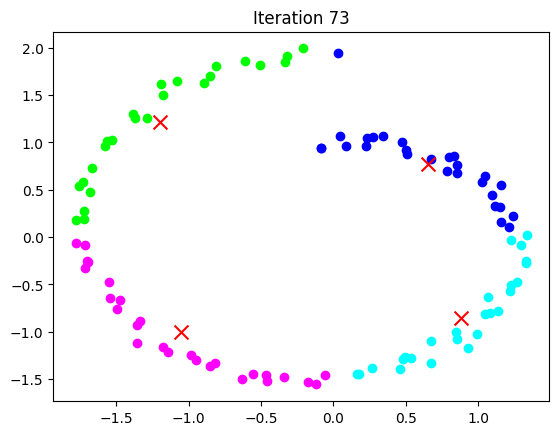

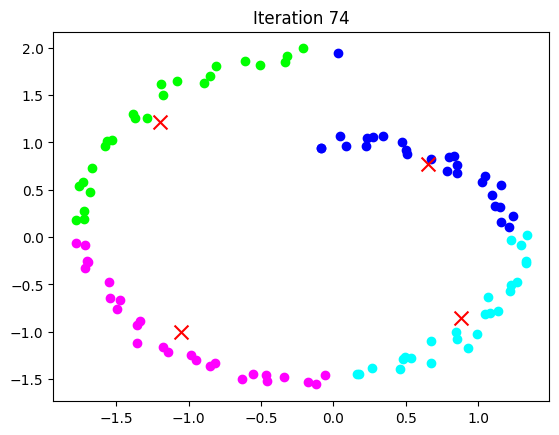

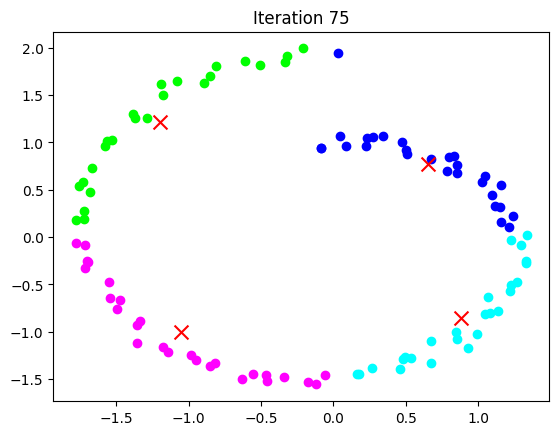

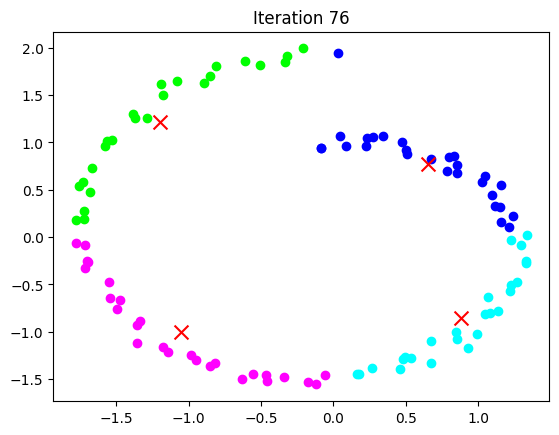

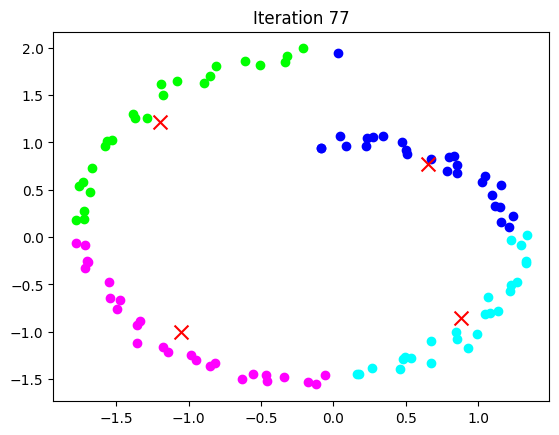

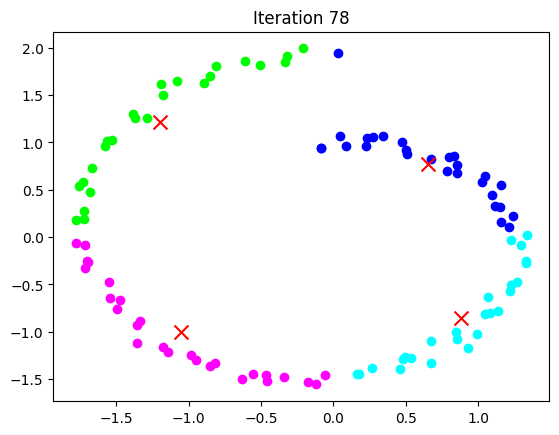

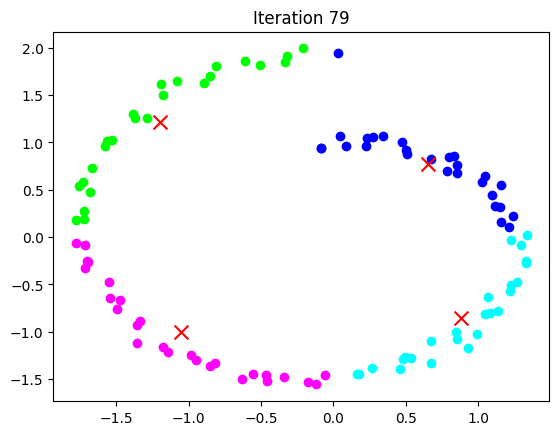

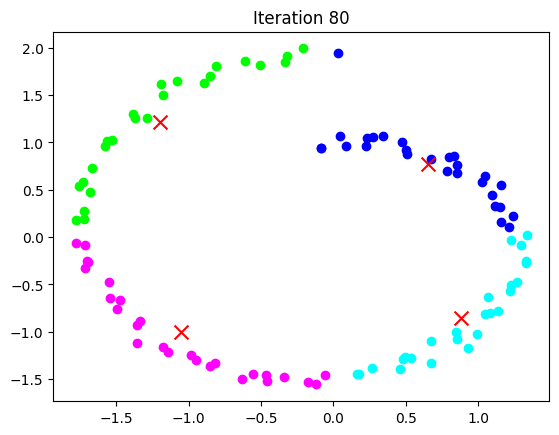

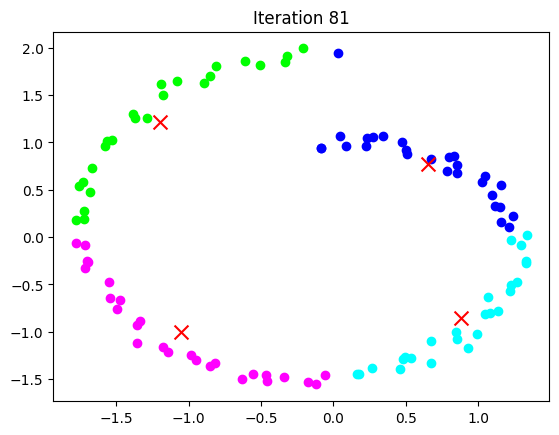

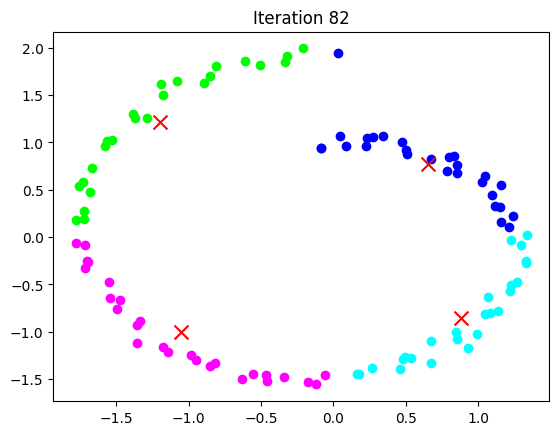

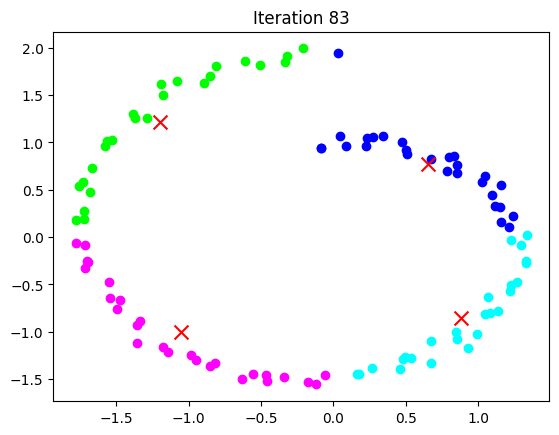

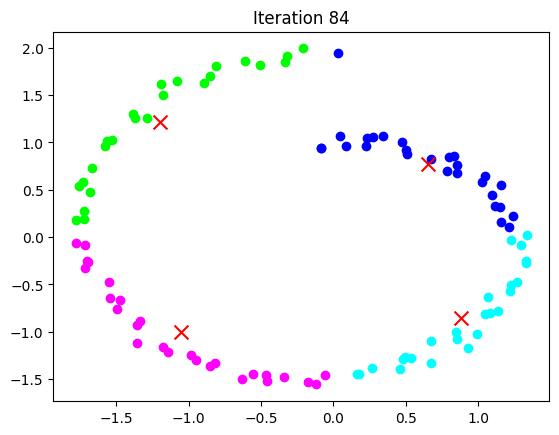

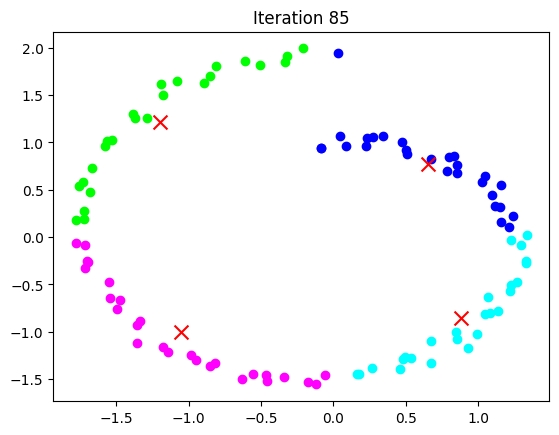

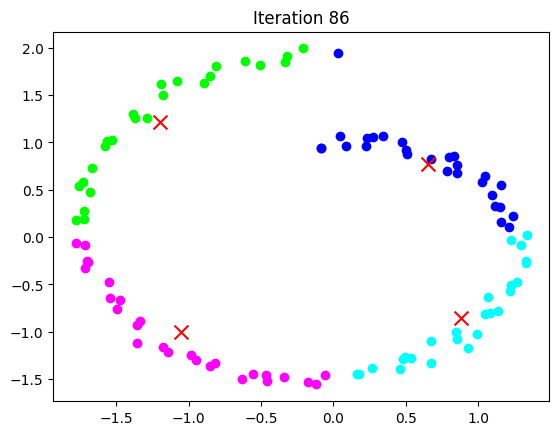

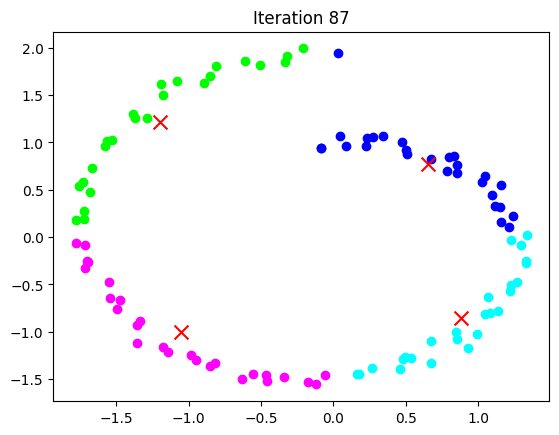

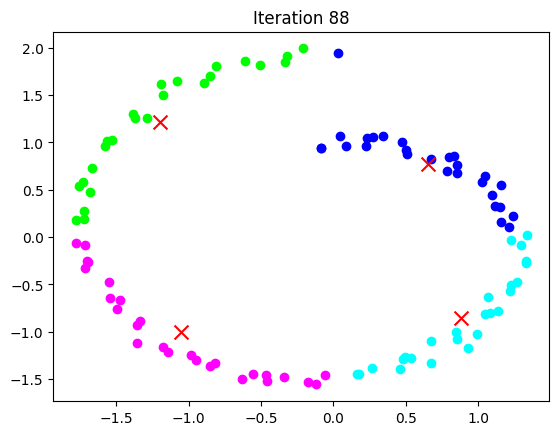

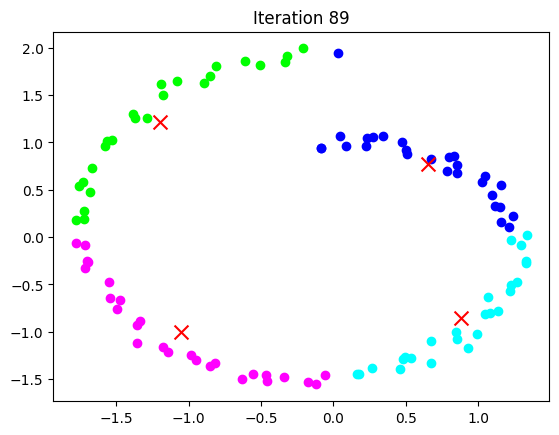

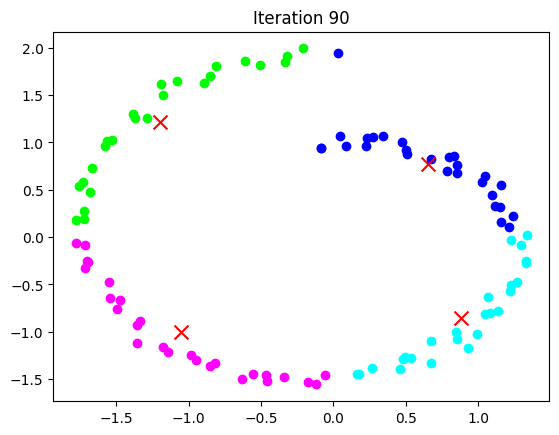

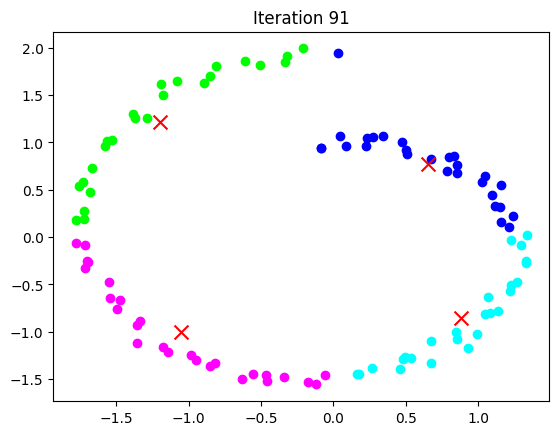

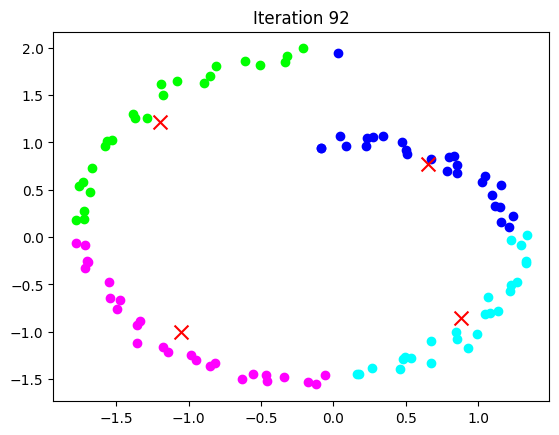

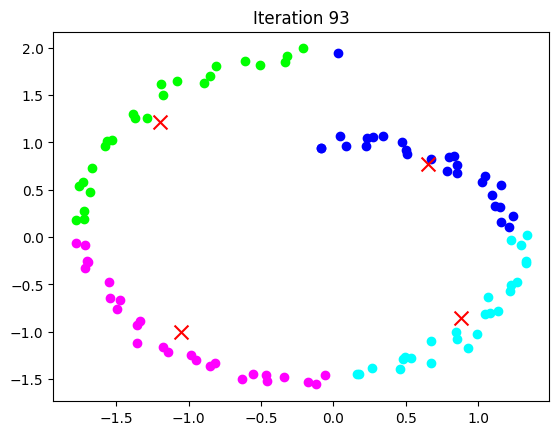

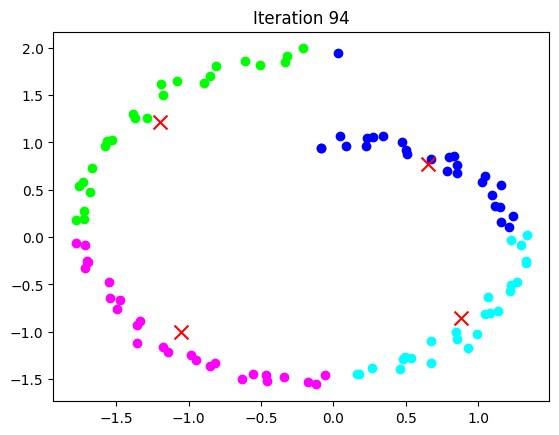

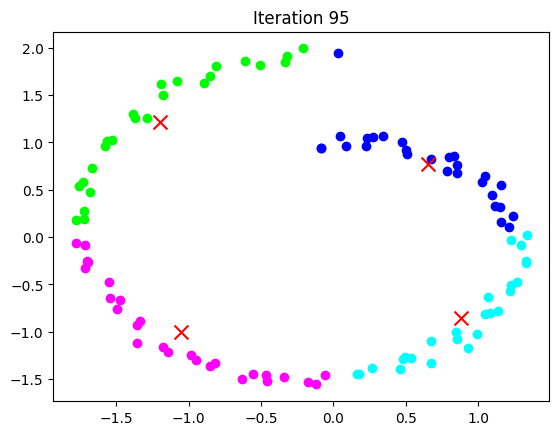

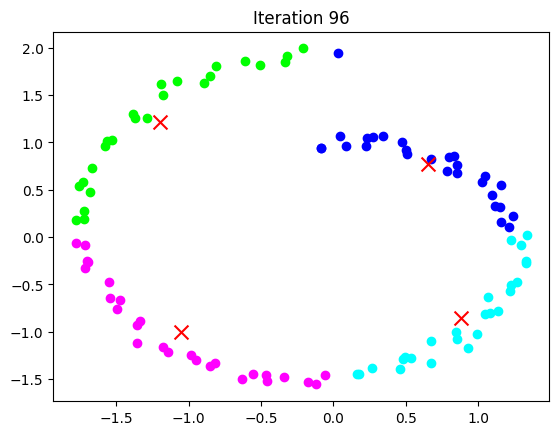

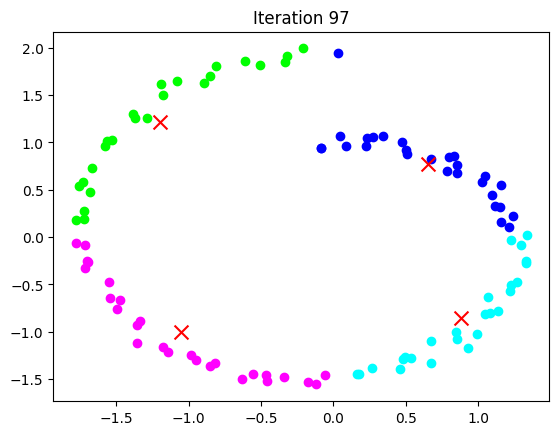

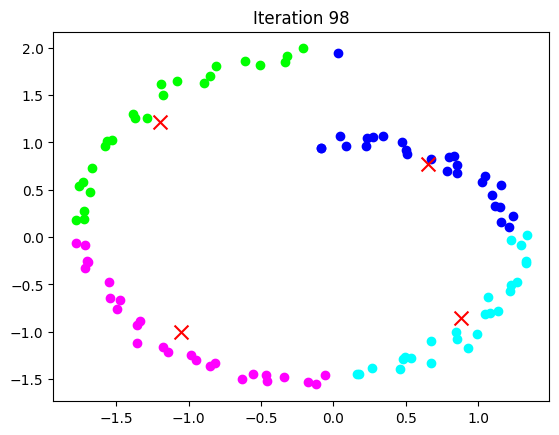

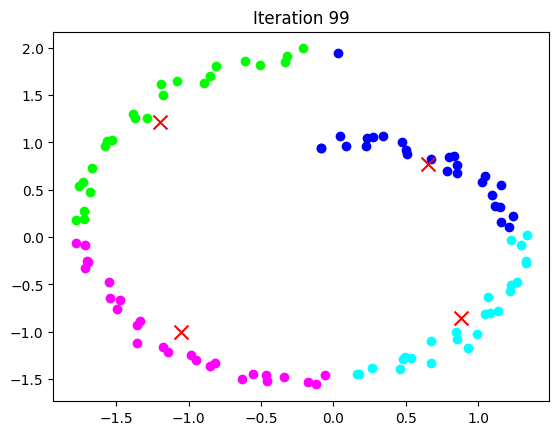

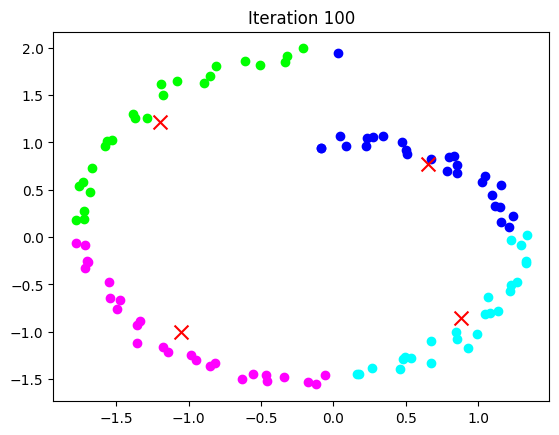

In [28]:
for iteration in range(iters):  # 2. Pętla wykonywana zadaną liczbę iteracji (iters)
    u_s = np.zeros(df.shape[0])
    for i, s in enumerate(df.values):  # 2.1. Pętla po wszystkich M próbkach, s to indeks aktualnej próbki
        distances = []
        for v in V.values:
            distances.append(euclidean_distance(s, v))  # 2.1.1. Wylicz odległości między próbką s a każdym środkiem grupy (V)
        u_s[i] = np.argmin(distances)  # 2.1.2. Wyznacz us równy indeksowi najbliższego środka grupy dla s-tej próbki
    plot_clusters(df=df, V=V, u_s=u_s, iteration=iteration)
    for j in range(m):  # 2.2. Pętla po wszystkich m grupach, j to indeks aktualnej grupy
        Xgr = df[u_s == j]  # 2.2.1. Wybierz próbki, należące do tej grupy (zbiór próbek o indeksach s, takich, że us == j), niech zbiór ten nazywa się Xgr
        if len(Xgr) > 0:  # 2.2.2. Jeśli zbiór Xgr jest pusty, wtedy pomiń wykonanie dalszej części tej pętli.
            V.iloc[j] = np.mean(Xgr, axis=0)  # 2.2.3. Wartość atrybutu grupy j-tej to średnia wartość atrybutu wszystkich próbek Xgr